<a href="https://colab.research.google.com/github/choi-yh/DataMining/blob/master/3_1_convexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

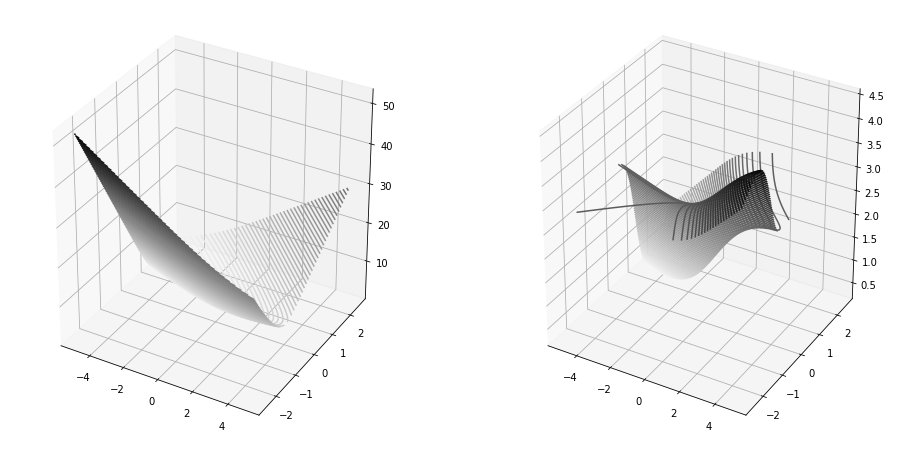

In [0]:
# Logistic Regression에서 Cross Entropy를 사용하는 이유
# SSE의 경우는 convex 하지 않기 때문에 gradient descent 알고리즘을 사용할 수 없다.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def sig(x):
    return 1 / (1 + np.exp(-x))

x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([0, 0, 0, 1, 1, 1])
xy = np.array([[1, 0], [2, 0], [3, 0], [4, 1], [5, 1], [6, 1]])
n = 100

a = np.linspace(-5, 5, n)
b = np.linspace(-2.5, 2.5, n)
a, b = np.meshgrid(a, b)

cost1 = np.zeros((100, 100)) # cross entropy function
for val in xy:
    tmp = -val[1] * np.log(sig(a + b * val[0])) - (1 - val[1]) * np.log(1 - sig(a + b * val[0]))
    cost1 += tmp

cost2 = np.zeros((100, 100)) # error sums of square function
for val in xy:
    tmp = (val[1] - sig(a + b * val[0])) ** 2
    cost2 += tmp

fig = plt.figure(figsize=(16, 8))

# cross entropy
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.contour3D(a, b, cost1, 100, cmap='binary') 

# SSE
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.contour3D(a, b, cost2, 100, cmap='binary') 

plt.show()